### Tải thư viện và dữ liệu

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


In [10]:
# Nạp dữ liệu
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Xem thông tin
print(df.shape)
df.head()

# Kiểm tra missing
print(df.isnull().sum())

# Điền giá trị thiếu (nếu có)
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode biến phân loại (nếu có cột dạng object như 'gender', 'smoking_history'…)
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


(100000, 9)
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


### Tiền xử lý dữ liệu

In [11]:
# Điền giá trị thiếu (nếu có)
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode biến phân loại (nếu có cột dạng object như 'gender', 'smoking_history'…)
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

### Chia dữ liệu train/test

In [12]:
X = df.drop("diabetes", axis=1)   # giả sử cột nhãn là 'diabetes'
y = df["diabetes"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Cây quyết định cơ bản

Train acc: 0.9718
Val acc: 0.97215


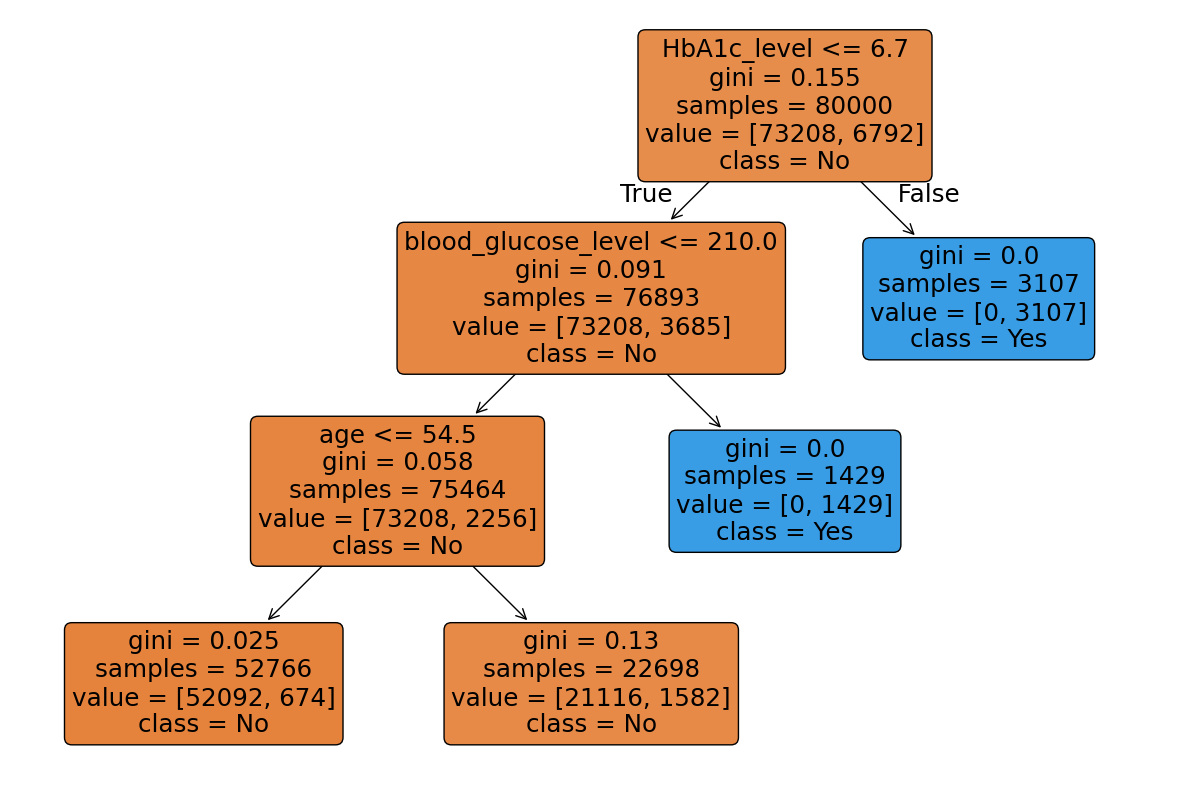

In [13]:
dt = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

print("Train acc:", dt.score(X_train, y_train))
print("Val acc:", dt.score(X_val, y_val))

# Vẽ cây trực tiếp bằng matplotlib
plt.figure(figsize=(15,10))
tree.plot_tree(dt, feature_names=X.columns, class_names=['No','Yes'],
               filled=True, rounded=True)
plt.show()


### Tối ưu tham số max_depth

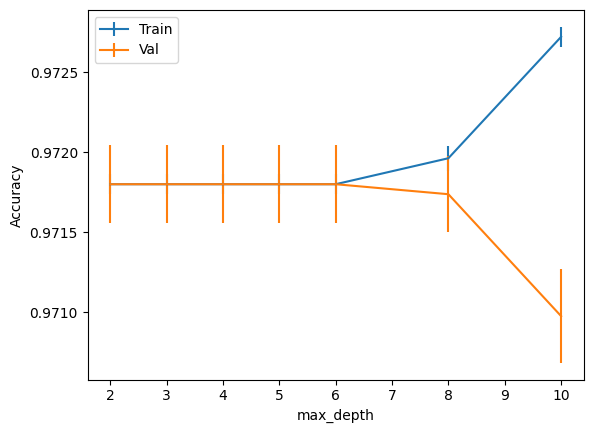

Best params: {'max_depth': 2}


In [14]:
params = {'max_depth':[2,3,4,5,6,8,10]}
cv_dt = GridSearchCV(tree.DecisionTreeClassifier(random_state=42),
                     param_grid=params, scoring='accuracy',
                     cv=5, return_train_score=True)
cv_dt.fit(X_train, y_train)

cv_results = pd.DataFrame(cv_dt.cv_results_)
plt.errorbar(cv_results['param_max_depth'], cv_results['mean_train_score'],
             yerr=cv_results['std_train_score']/np.sqrt(5), label="Train")
plt.errorbar(cv_results['param_max_depth'], cv_results['mean_test_score'],
             yerr=cv_results['std_test_score']/np.sqrt(5), label="Val")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print("Best params:", cv_dt.best_params_)


### Rừng cây (Random Forest)

In [15]:
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators':[50,100,200], 'max_depth':[3,5,7,None]}
cv_rf = GridSearchCV(rf, param_grid=rf_params, scoring='accuracy',
                     cv=5, return_train_score=True)
cv_rf.fit(X_train, y_train)

print("Best params:", cv_rf.best_params_)
print("Validation acc:", cv_rf.best_score_)


Best params: {'max_depth': 3, 'n_estimators': 200}
Validation acc: 0.9718


### Độ quan trọng đặc trưng

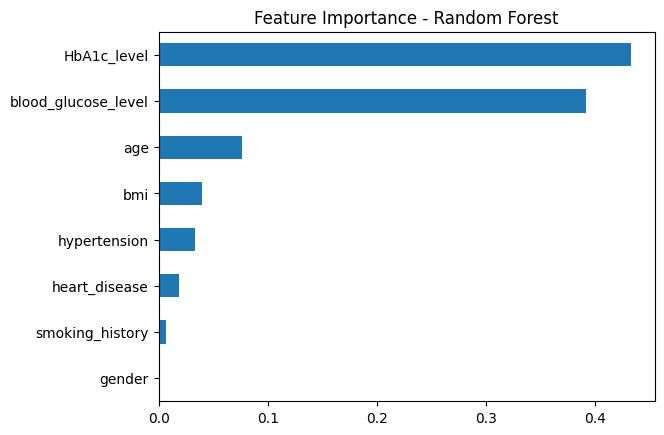

In [16]:
feat_imp = pd.Series(cv_rf.best_estimator_.feature_importances_,
                     index=X.columns).sort_values()
feat_imp.plot(kind='barh')
plt.title("Feature Importance - Random Forest")
plt.show()
